# Limpeza e Tratamento dos dados

## Regras de Negócio

* Missao: Nossa missão é pegar uma base de dados de uma companhia de telefonia e fazer a limpeza e o tratamento dos dados em um dataset único com os dados do cliente e no final com o Churn 

## Bibliotecas

In [112]:
import pandas as pd
import json
import numpy as np
import seaborn as sns

In [113]:
pd.set_option('display.max_columns', 100)

## Base de dados

In [114]:
url ='dataset_telecon.json'

In [115]:
dados = pd.read_json(url)

In [116]:
dados.head()

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."


## Análise Exploratória dos dados

In [117]:
dados.shape

(7344, 6)

Como vimos nossos dados estão em um formato json, para nós fazermos uma análise nós precisamos fazer um tratamento nesses dados

## Pré-processamento dos dados

In [118]:
dados.head()

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."


In [119]:
# Tratamento da coluna cliente
pd.json_normalize(dados.cliente).head()

,genero,idoso,parceiro,dependentes,tempo_servico
0,feminino,0,sim,sim,9.0
1,masculino,0,nao,nao,9.0
2,masculino,0,nao,nao,4.0
3,masculino,1,sim,nao,13.0
4,feminino,1,sim,nao,3.0


In [120]:
coluna_json = dados.columns[2:]
for coluna in coluna_json:
    dados = dados.join(pd.json_normalize(dados[coluna]))

In [121]:
dados.head()

,id_cliente,Churn,cliente,telefone,internet,conta,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N...",feminino,0,sim,sim,9.0,sim,nao,DSL,nao,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron...",masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron...",masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron...",masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron...",feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [122]:
dados_novos = dados.drop(columns=coluna_json, axis=1)

In [123]:
dados_novos.head()

,id_cliente,Churn,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,nao,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [124]:
dados_novos.columns = dados_novos.columns.str.replace('.','_').str.lower()

In [125]:
dados_novos.columns

Index(['id_cliente', 'churn', 'genero', 'idoso', 'parceiro', 'dependentes',
       'tempo_servico', 'servico_telefone', 'varias_linhas',
       'servico_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming',
       'filmes_streaming', 'contrato', 'faturamente_eletronico',
       'metodo_pagamento', 'cobranca_mensal', 'cobranca_total'],
      dtype='object')

In [126]:
dados_novos.head()

,id_cliente,churn,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,nao,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [127]:
colunas_novas = ['id_cliente', 'genero', 'idoso', 'parceiro', 'dependentes', 
                 'tempo_servico', 'servico_telefone', 'varias_linhas', 
                 'servico_internet', 'seguranca_online', 'backup_online', 
                 'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming', 
                 'filmes_streaming', 'contrato', 'faturamente_eletronico', 
                 'metodo_pagamento', 'cobranca_mensal', 'cobranca_total', 'churn']
dados_novos = dados_novos[colunas_novas]

In [128]:
dados_novos.head()

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
0,0002-ORFBO,feminino,0,sim,sim,9.0,sim,nao,DSL,nao,sim,nao,sim,sim,nao,None,None,None,NaN,None,nao
1,0003-MKNFE,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4,nao
2,0004-TLHLJ,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85,sim
3,0011-IGKFF,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85,sim
4,0013-EXCHZ,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4,sim


In [129]:
dados_novos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7344 non-null   object 
 1   genero                  7344 non-null   object 
 2   idoso                   7344 non-null   int64  
 3   parceiro                7344 non-null   object 
 4   dependentes             7344 non-null   object 
 5   tempo_servico           7336 non-null   float64
 6   servico_telefone        7344 non-null   object 
 7   varias_linhas           7344 non-null   object 
 8   servico_internet        7344 non-null   object 
 9   seguranca_online        7344 non-null   object 
 10  backup_online           7344 non-null   object 
 11  protecao_dispositivo    7344 non-null   object 
 12  suporte_tecnico         7344 non-null   object 
 13  tv_streaming            7344 non-null   object 
 14  filmes_streaming        7344 non-null   

## Colunas com sim e nao

In [130]:
dados_novos.head()

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
0,0002-ORFBO,feminino,0,sim,sim,9.0,sim,nao,DSL,nao,sim,nao,sim,sim,nao,None,None,None,NaN,None,nao
1,0003-MKNFE,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4,nao
2,0004-TLHLJ,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85,sim
3,0011-IGKFF,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85,sim
4,0013-EXCHZ,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4,sim


In [131]:
dados_novos.dropna(inplace=True)

In [132]:
colunas_sim_nao = dados_novos.columns[[3,4,6,7,9,10,11,12,13,14,16,20]]
colunas_sim_nao

Index(['parceiro', 'dependentes', 'servico_telefone', 'varias_linhas',
       'seguranca_online', 'backup_online', 'protecao_dispositivo',
       'suporte_tecnico', 'tv_streaming', 'filmes_streaming',
       'faturamente_eletronico', 'churn'],
      dtype='object')

In [133]:
for i in colunas_sim_nao:
    dados_novos[i] = dados_novos[i].replace('nao', 0).replace('sim',1).replace('',0).replace('[\s\D]', 0, regex=True).dropna().astype('int64')


In [134]:
dados_novos

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
1,0003-MKNFE,masculino,0,0,0,9.0,1,1,DSL,0,0,0,0,0,1,mes a mes,0,cheque pelo correio,59.90,542.4,0
2,0004-TLHLJ,masculino,0,0,0,4.0,1,0,fibra otica,0,0,1,0,0,0,mes a mes,1,cheque eletronico,73.90,280.85,1
3,0011-IGKFF,masculino,1,1,0,13.0,1,0,fibra otica,0,1,1,0,1,1,mes a mes,1,cheque eletronico,98.00,1237.85,1
4,0013-EXCHZ,feminino,1,1,0,3.0,1,0,fibra otica,0,0,0,1,1,0,mes a mes,1,cheque pelo correio,83.90,267.4,1
5,0013-MHZWF,feminino,0,0,1,9.0,1,0,DSL,0,0,0,1,1,1,mes a mes,1,cartao de credito (automatico),69.40,571.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,5172-RKOCB,masculino,0,1,0,72.0,1,1,fibra otica,1,1,0,1,1,1,dois anos,1,cartao de credito (automatico),108.95,7875,0
7340,1934-MKPXS,masculino,0,1,1,33.0,1,0,nao,0,0,0,0,0,0,um ano,0,cartao de credito (automatico),20.10,620.55,0
7341,5959-BELXA,masculino,1,0,0,32.0,1,1,fibra otica,0,0,0,0,1,1,mes a mes,1,cartao de credito (automatico),96.15,3019.25,1
7342,3601-UTZXO,masculino,0,1,1,41.0,1,0,nao,0,0,0,0,0,0,um ano,0,transferencia bancaria (automatica),19.50,798.2,0


## Coluna Numericas flutuantes

In [135]:
colunas_float = dados_novos.columns[[5,-2, -3]]

In [136]:
dados_novos[colunas_float].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7298 entries, 1 to 7343
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tempo_servico    7298 non-null   float64
 1   cobranca_total   7298 non-null   object 
 2   cobranca_mensal  7298 non-null   float64
dtypes: float64(2), object(1)
memory usage: 228.1+ KB


In [137]:
dados_novos['cobranca_total'] = dados_novos['cobranca_total'].replace('\s', np.nan, regex=True).astype('float64')

In [138]:
dados_novos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7298 entries, 1 to 7343
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7298 non-null   object 
 1   genero                  7298 non-null   object 
 2   idoso                   7298 non-null   int64  
 3   parceiro                7298 non-null   int64  
 4   dependentes             7298 non-null   int64  
 5   tempo_servico           7298 non-null   float64
 6   servico_telefone        7298 non-null   int64  
 7   varias_linhas           7298 non-null   int64  
 8   servico_internet        7298 non-null   object 
 9   seguranca_online        7298 non-null   int64  
 10  backup_online           7298 non-null   int64  
 11  protecao_dispositivo    7298 non-null   int64  
 12  suporte_tecnico         7298 non-null   int64  
 13  tv_streaming            7298 non-null   int64  
 14  filmes_streaming        7298 non-null   int64

In [139]:
dados_novos['cobranca_total'].mean()

2314.495608618087

In [140]:
dados_novos['cobranca_total'].fillna(dados_novos['cobranca_total'].mean(), inplace=True)

In [141]:
dados_novos.servico_internet = dados_novos.servico_internet.replace('nao', 'nao possui')

In [142]:
dados_novos

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
1,0003-MKNFE,masculino,0,0,0,9.0,1,1,DSL,0,0,0,0,0,1,mes a mes,0,cheque pelo correio,59.90,542.40,0
2,0004-TLHLJ,masculino,0,0,0,4.0,1,0,fibra otica,0,0,1,0,0,0,mes a mes,1,cheque eletronico,73.90,280.85,1
3,0011-IGKFF,masculino,1,1,0,13.0,1,0,fibra otica,0,1,1,0,1,1,mes a mes,1,cheque eletronico,98.00,1237.85,1
4,0013-EXCHZ,feminino,1,1,0,3.0,1,0,fibra otica,0,0,0,1,1,0,mes a mes,1,cheque pelo correio,83.90,267.40,1
5,0013-MHZWF,feminino,0,0,1,9.0,1,0,DSL,0,0,0,1,1,1,mes a mes,1,cartao de credito (automatico),69.40,571.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,5172-RKOCB,masculino,0,1,0,72.0,1,1,fibra otica,1,1,0,1,1,1,dois anos,1,cartao de credito (automatico),108.95,7875.00,0
7340,1934-MKPXS,masculino,0,1,1,33.0,1,0,nao possui,0,0,0,0,0,0,um ano,0,cartao de credito (automatico),20.10,620.55,0
7341,5959-BELXA,masculino,1,0,0,32.0,1,1,fibra otica,0,0,0,0,1,1,mes a mes,1,cartao de credito (automatico),96.15,3019.25,1
7342,3601-UTZXO,masculino,0,1,1,41.0,1,0,nao possui,0,0,0,0,0,0,um ano,0,transferencia bancaria (automatica),19.50,798.20,0


In [143]:
dados_novos.servico_internet.value_counts()

servico_internet
fibra otica    3214
DSL            2490
nao possui     1594
Name: count, dtype: int64

In [144]:
dados_novos.contrato.value_counts()

contrato
mes a mes    4033
dois anos    1749
um ano       1516
Name: count, dtype: int64

<Axes: >

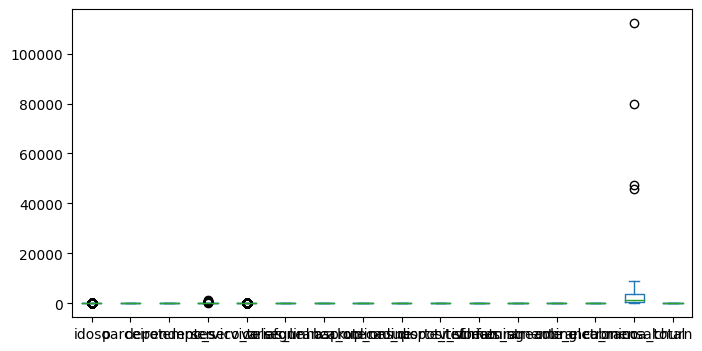

In [145]:
dados_novos.plot(kind='box', figsize=(8,4))

<Axes: >

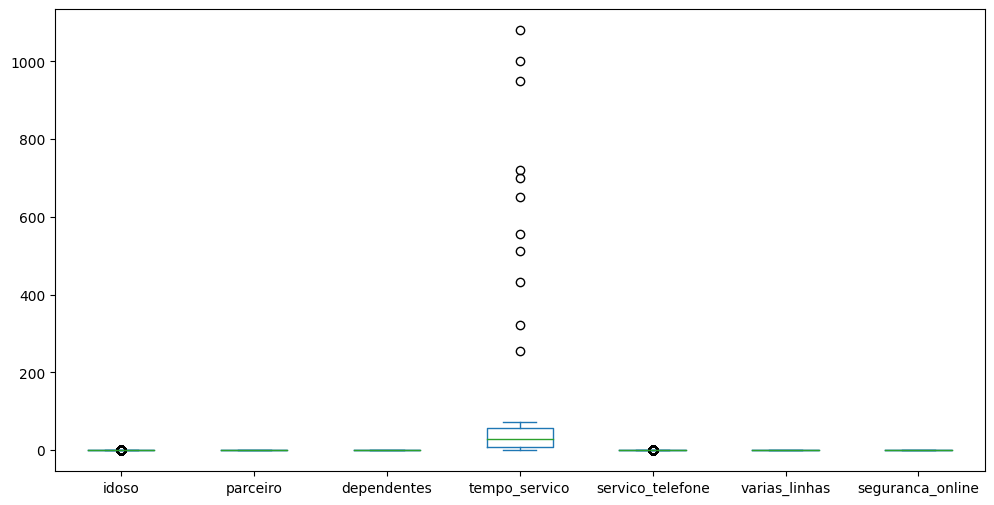

In [146]:
dados_novos.iloc[:,:10].plot(kind='box', figsize=(12,6))

<Axes: >

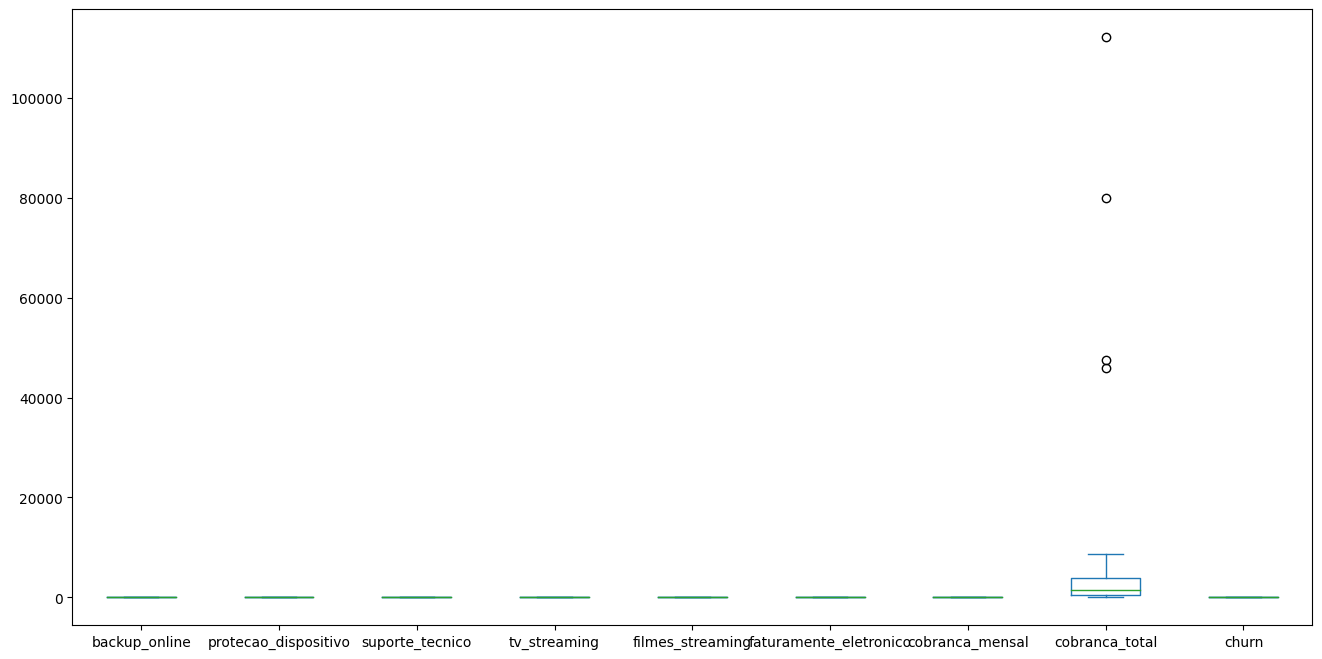

In [147]:
dados_novos.iloc[:,10:].plot(kind='box', figsize=(16,8))

<Axes: >

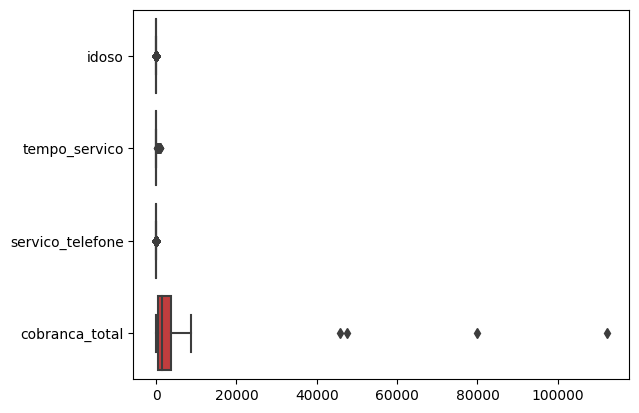

In [148]:
sns.boxplot(dados_novos[['idoso', 'tempo_servico', 'servico_telefone', 'cobranca_total']], orient='h')

## Tratamento outlier coluna cobranca_total

In [149]:
dados_novos.cobranca_total.describe()

count      7298.000000
mean       2314.495609
std        2856.238236
min          18.800000
25%         399.300000
50%        1389.475000
75%        3778.175000
max      112212.000000
Name: cobranca_total, dtype: float64

In [150]:
dados_novos[dados_novos.cobranca_total >= 10000]

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
2001,2830-LEWOA,masculino,0,1,1,1080.0,1,0,fibra otica,0,1,1,1,1,1,um ano,0,cartao de credito (automatico),103.9,112212.0,0
2002,2831-EBWRN,masculino,0,0,0,1000.0,1,0,DSL,0,0,0,0,0,0,mes a mes,1,cheque eletronico,45.9,45900.0,0
2008,2834-SPCJV,masculino,0,1,0,950.0,1,0,fibra otica,1,0,0,0,1,0,mes a mes,0,cheque eletronico,84.1,79895.0,1
2019,2851-STERV,masculino,1,0,0,650.0,1,0,DSL,0,0,1,1,1,1,um ano,1,cheque eletronico,73.0,47450.0,0


In [151]:
media_menos10 = dados_novos[dados_novos.cobranca_total <= 10000]['cobranca_total'].mean()
media_menos10

2276.629003522731

In [152]:
dados_novos.loc[dados_novos.cobranca_total >= 10000, 'cobranca_total'] = media_menos10

<Axes: >

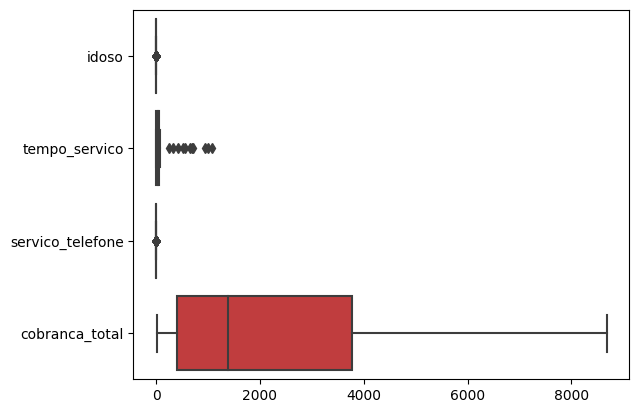

In [153]:
sns.boxplot(dados_novos[['idoso', 'tempo_servico', 'servico_telefone', 'cobranca_total']], orient='h')

## Tratamento outlier coluna tempo_servico

<Axes: >

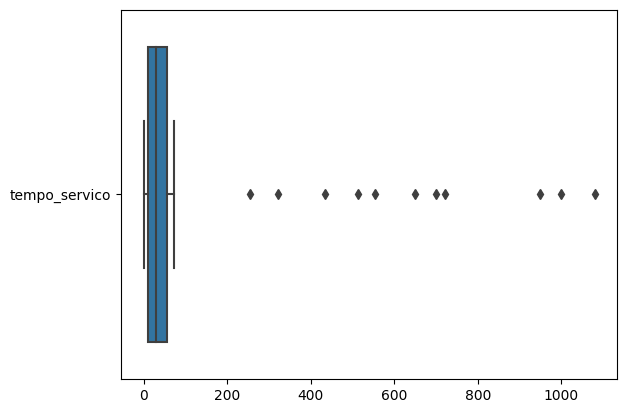

In [154]:
sns.boxplot(dados_novos[['tempo_servico']], orient='h')

In [155]:
dados_novos.loc[dados_novos.tempo_servico <= 200, 'tempo_servico'].mean()

32.32784410594209

In [156]:
dados_novos.loc[dados_novos.tempo_servico >= 200, 'tempo_servico'] = 32.32

<Axes: >

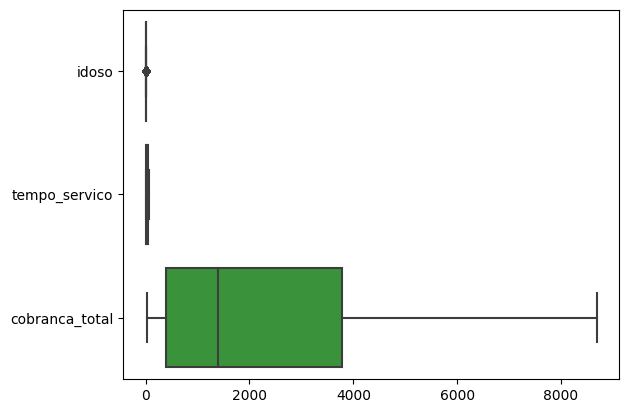

In [157]:
sns.boxplot(dados_novos[['idoso', 'tempo_servico','cobranca_total']], orient='h')

# Machine Learning

In [158]:
X = dados_novos.iloc[:,1:].drop('churn', axis=1)
y = dados_novos['churn'].values


In [159]:
X = pd.get_dummies(X, drop_first=True, dtype=int)

## Divisão em treino e teste

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, shuffle=True)

In [162]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((5838, 23), (1460, 23), (5838,), (1460,))

In [163]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [164]:
clf_tree = DecisionTreeClassifier()
clf_random_forest = RandomForestClassifier()

resultados_tree = []
resultados_random_forest = []


for i in range(30):
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=i)
    scores = cross_val_score(clf_tree, X, y, cv=kfold)
    resultados_tree.append(scores.mean())
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=i)
    scores = cross_val_score(clf_random_forest, X, y, cv=kfold)
    resultados_random_forest.append(scores.mean())

In [165]:
np.mean(resultados_tree)

0.733480212568188

In [166]:
np.mean(resultados_random_forest)

0.7915637469837662

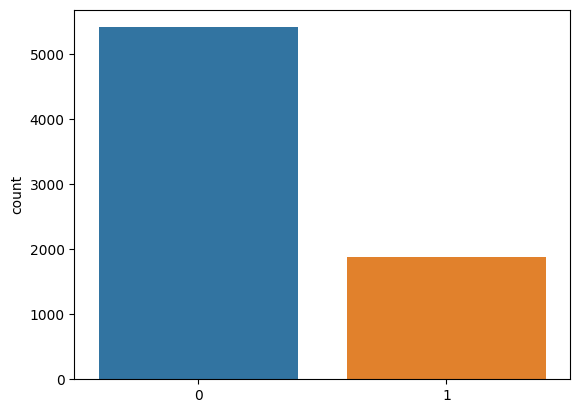

In [256]:
sns.countplot(x=y);

## Balanceamento do dataset

In [167]:
from imblearn.over_sampling import SMOTE


In [168]:
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X, y)

In [169]:
X_smote.shape, y_smote.shape

((10834, 23), (10834,))

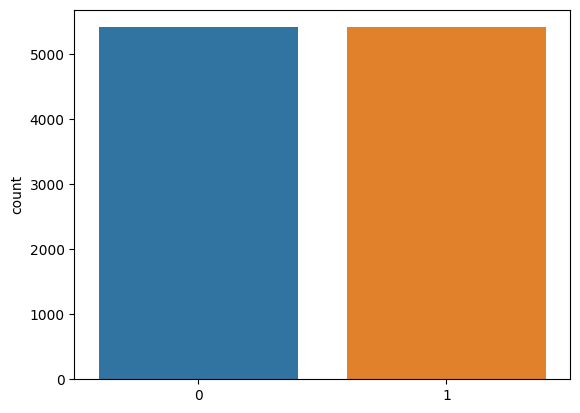

In [257]:
sns.countplot(x=y_smote);

# Treinando Algoritmos de Classificação

In [328]:
def classificador_cross(X, y, modelo, nome):
    
    medias = []
    resultados = pd.DataFrame()
    for i in range(30):

        kfold = KFold(n_splits=5, shuffle=True, random_state=i)
        scores = cross_val_score(modelo, X, y, cv=kfold)
        medias.append(scores.mean())
    
    resultados[nome] = medias
    return resultados

In [333]:
tree = DecisionTreeClassifier()
resultados_arvore = classificador_cross(X_smote, y_smote, tree, 'Arvore')

In [334]:
random_florest = RandomForestClassifier()
resultados_arvore_random = classificador_cross(X_smote, y_smote, random_florest, 'Random_florest')

In [337]:
from sklearn.linear_model import LogisticRegression
Logistica = LogisticRegression(max_iter=5000)

resultados_logistica = classificador_cross(X_smote, y_smote, Logistica, 'Logistica')

In [349]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier()
resultados_extra_tree = classificador_cross(X_smote, y_smote, extra_tree, 'extra_tree')

In [368]:
from sklearn.neural_network import MLPClassifier

rna = MLPClassifier()
resultados_rna = classificador_cross(X_smote, y_smote, rna, 'rna')

C:\Users\johnn\AppData\Local\Temp\ipykernel_15532\3867000564.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultados_rna)


<Axes: ylabel='Density'>

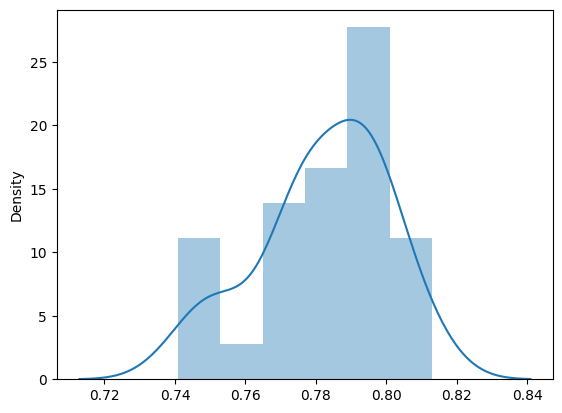

In [379]:
sns.distplot(resultados_rna)

In [370]:
resultados = pd.concat([resultados_arvore, resultados_arvore_random, resultados_logistica,
                        resultados_extra_tree, resultados_rna],axis=1)
resultados.head()

,Arvore,Random_florest,Logistica,extra_tree,rna
0,0.795735,0.841702,0.818349,0.827488,0.740807
1,0.788350,0.843271,0.818257,0.828503,0.800166
2,0.787338,0.843272,0.823426,0.829611,0.777921
3,0.793613,0.842071,0.819365,0.828502,0.794164
4,0.790014,0.844379,0.817427,0.830072,0.773674


In [371]:
resultados.columns = resultados.columns.str.lower()

# Análise Estatística do Melhor Algoritmo

In [372]:
from scipy.stats import f_oneway

In [373]:
stat, p_value = f_oneway(resultados_arvore, resultados_arvore_random, resultados_logistica,
                         resultados_extra_tree, resultados_rna)
stat, p_value

(array([282.6874777]), array([2.21729474e-67]))

In [374]:
if p_value < 0.05:
    print('Concluimos que há uma diferença significativa entre os algoritmos')
else:
    print('Concluimos que não há uma diferença significativa entre os algoritmos')

Concluimos que há uma diferença significativa entre os algoritmos


In [375]:
resultados.head()

,arvore,random_florest,logistica,extra_tree,rna
0,0.795735,0.841702,0.818349,0.827488,0.740807
1,0.788350,0.843271,0.818257,0.828503,0.800166
2,0.787338,0.843272,0.823426,0.829611,0.777921
3,0.793613,0.842071,0.819365,0.828502,0.794164
4,0.790014,0.844379,0.817427,0.830072,0.773674


In [376]:
arvore = ['Arvore' for _ in range(30)]
random_forest = ['Random_forest' for _ in range(30)]
logistica = ['logistica' for _ in range(30)]
extra_tree = ['extra_tree' for _ in range(30)]
rna = ['rede_neural' for _ in range(30)]

algoritmos = np.concatenate([arvore, random_forest, logistica, extra_tree, rna])
valores = np.concatenate([resultados_arvore, resultados_arvore_random, resultados_logistica,
                          resultados_extra_tree, resultados_rna]).ravel()

dados_comparacao = pd.DataFrame({'valores': valores, 'algoritmos': algoritmos})
dados_comparacao

,valores,algoritmos
0,0.795735,Arvore
1,0.788350,Arvore
2,0.787338,Arvore
3,0.793613,Arvore
4,0.790014,Arvore
...,...,...
145,0.750318,rede_neural
146,0.781523,rede_neural
147,0.812903,rede_neural
148,0.793891,rede_neural


       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       Arvore Random_forest   0.0533    0.0  0.0472  0.0593   True
       Arvore    extra_tree   0.0395    0.0  0.0334  0.0455   True
       Arvore     logistica   0.0289    0.0  0.0229  0.0349   True
       Arvore   rede_neural  -0.0077 0.0049 -0.0138 -0.0017   True
Random_forest    extra_tree  -0.0138    0.0 -0.0198 -0.0078   True
Random_forest     logistica  -0.0244    0.0 -0.0304 -0.0184   True
Random_forest   rede_neural   -0.061    0.0  -0.067  -0.055   True
   extra_tree     logistica  -0.0106    0.0 -0.0166 -0.0045   True
   extra_tree   rede_neural  -0.0472    0.0 -0.0532 -0.0411   True
    logistica   rede_neural  -0.0366    0.0 -0.0426 -0.0306   True
------------------------------------------------------------------


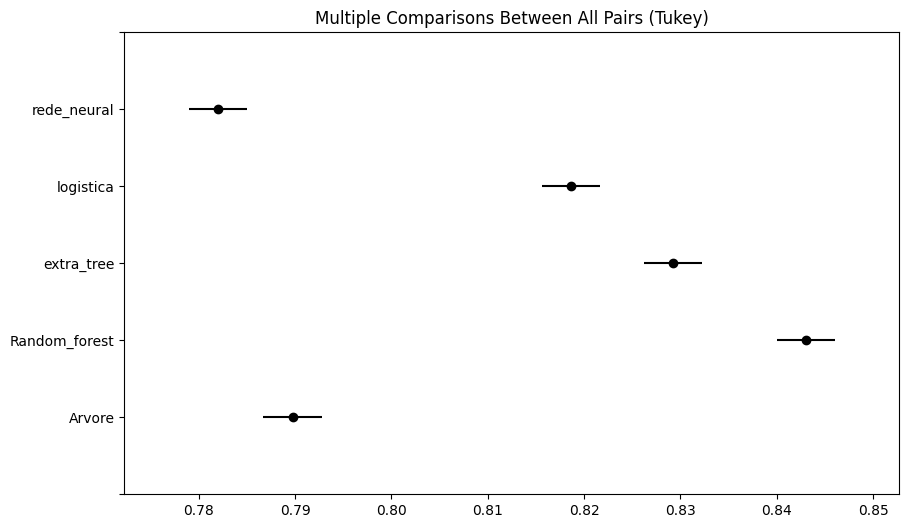

In [377]:
from statsmodels.stats.multicomp import MultiComparison
compara_grupos = MultiComparison(dados_comparacao['valores'], dados_comparacao['algoritmos'])
teste = compara_grupos.tukeyhsd()
print(teste)
teste.plot_simultaneous();